In [15]:
import pandas as pd
import os
mobilefile=os.path.join(r"C:\Users\pabba\OneDrive\Documents\Python Data Analysis\mobiles1.csv")
mobileEDA=pd.read_csv(mobilefile)
mobileEDA.head()

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,5000 mAh Battery,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile ...
1,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design
2,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
3,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
4,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot


In [16]:
print(mobileEDA['memory'])

0       4 GB RAM | 64 GB ROM | Expandable Upto 512 GB
1                                4 GB RAM | 64 GB ROM
2                               4 GB RAM | 128 GB ROM
3                               4 GB RAM | 128 GB ROM
4       3 GB RAM | 32 GB ROM | Expandable Upto 256 GB
                            ...                      
979       1 GB RAM | 8 GB ROM | Expandable Upto 32 MB
980                              3 GB RAM | 32 GB ROM
981     4 GB RAM | 64 GB ROM | Expandable Upto 256 GB
982       1 GB RAM | 8 GB ROM | Expandable Upto 32 GB
983    4 GB RAM | 256 GB ROM | Expandable Upto 400 GB
Name: memory, Length: 984, dtype: object


To perform a comprehensive Exploratory Data Analysis (EDA) on this dataset, we'll consider various scenarios related to the columns battery, memory, price, processor, and warranty. The EDA will include:

Distribution Analysis: Understand the distribution of key numerical features like price, battery capacity, and memory.

Correlation Analysis: Identify any significant correlations between features, especially focusing on how battery, memory, price, and processor specifications relate to each other.

Comparative Analysis: Compare different mobiles based on their specifications to identify which ones offer the best value for money or the best performance in specific categories.

Trend Analysis: Look for any trends in the data, such as whether higher-priced phones consistently offer better specifications or if there's a trend in battery capacity improvements over time (if temporal data is available).


Let's start with a high-level statistical summary of the numerical columns to get a sense of their distributions.

In [2]:
mobileEDA.describe()

,price,rating
count,984.000000,971.000000
mean,15429.848577,4.241195
std,12891.355967,0.300296
min,887.000000,2.700000
25%,7499.000000,4.100000
50%,11649.000000,4.300000
75%,17999.250000,4.400000
max,104999.000000,4.900000


The statistical summary provides insights into the price and rating columns, as these are the numerical columns available in the dataset. Here's a brief overview:

Price: The average price of the mobiles in the dataset is approximately 15,429.85, with a wide range from 887 to 104,999, indicating a diverse set of mobiles from budget to premium categories.
Rating: The average rating is around 4.24 out of 5, with the minimum rating being 2.7 and the maximum 4.9. This suggests that most mobiles in the dataset are well-received by users.


Next, let's explore the distribution of these numerical features more visually to better understand their spread and any potential outliers. We'll also start looking into the categorical features like battery, memory, processor, and warranty to see how they might affect the price and ratings.

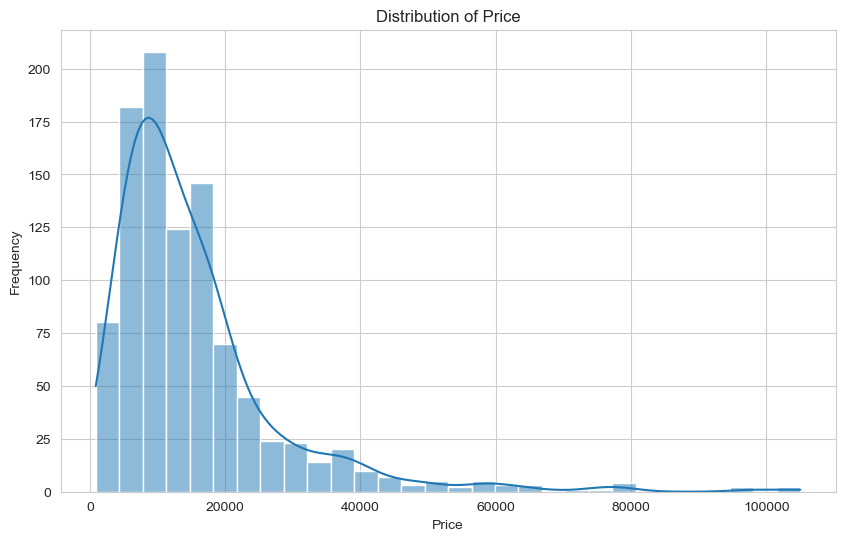

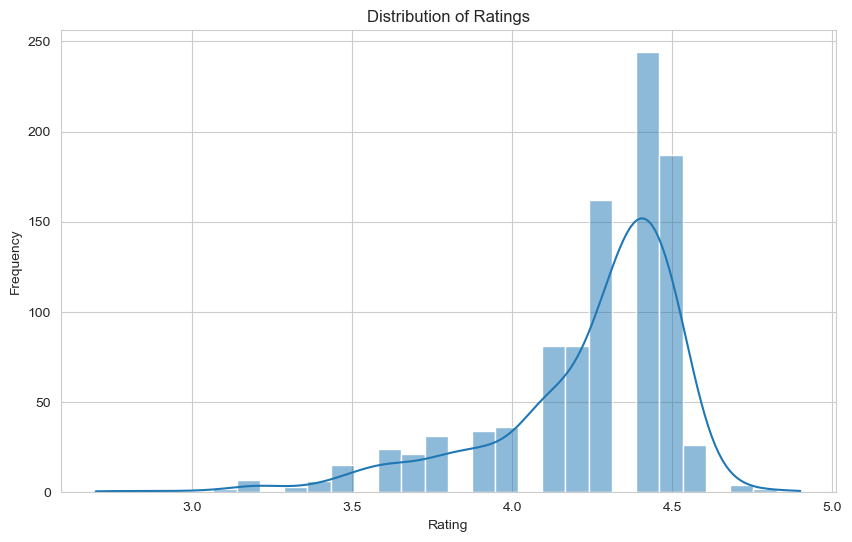

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plotting the distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(mobileEDA['price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(mobileEDA['rating'].dropna(), kde=True, bins=30) # Dropping NA values for plotting
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The Price distribution shows a right-skewed pattern, indicating that most mobiles are priced in the lower to mid-range, with fewer mobiles in the high-price range. This is consistent with a market where budget and mid-range phones are more common.

The Ratings distribution is slightly left-skewed, with most mobiles receiving ratings between 4 and 5. This suggests that the majority of mobiles in the dataset are well-received by users, with few exceptions.

Next, let's explore the relationships between price, battery, memory, processor, and warranty to understand how these features influence the price and ratings of mobiles.

Examining the RELATIONSHIP BETWEEN PRICE AND BATTERY CAPACITY.

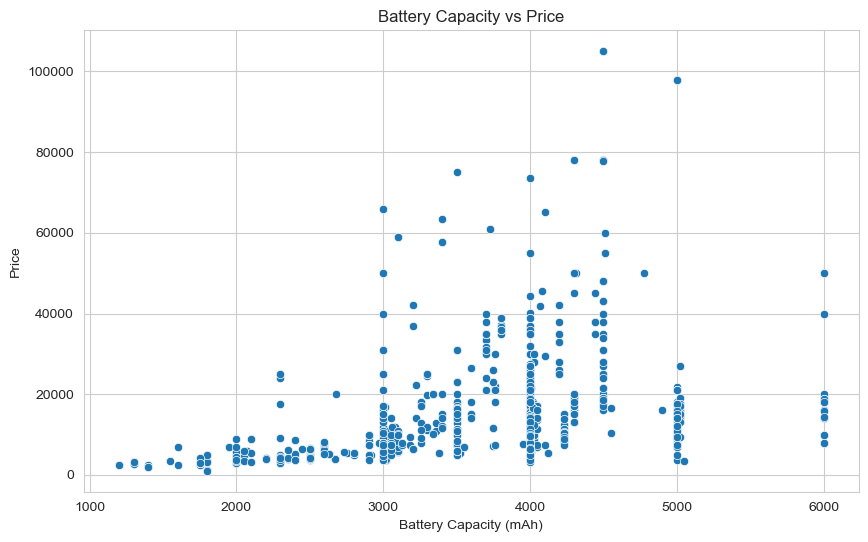

In [4]:
# Extracting numeric battery capacity
import pandas as pd
import re

def extract_battery_capacity(battery_str):
    # Extracting the numeric part of the battery capacity
    match = re.search(r'(\d+)', battery_str)
    if match:
        return int(match.group(1))
    else:
        return None

mobileEDA['battery_capacity'] = mobileEDA['battery'].apply(extract_battery_capacity)
#mobileEDA['battery_capacity'] = mobileEDA['battery'].str.extract('(\d+)mAh').astype(float)

# Plotting the relationship between battery capacity and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='battery_capacity', y='price', data=mobileEDA)
plt.title('Battery Capacity vs Price')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Price')
plt.show()

The scatterplot illustrates that there isn't a clear linear relationship between battery capacity (mAh) and price. Mobiles with a wide range of battery capacities are spread across various price points. 

This suggests that while battery capacity is an important feature, it's not the sole determinant of a mobile's price. Other factors, such as brand, processor, memory, and additional features, likely play significant roles in determining the price.

Next, we could explore other relationships, such as how memory or processor specifications correlate with price, or if there's any pattern in ratings based on these features

THE RELATIONSHIP BETWEEN MEMORY AND PRICE

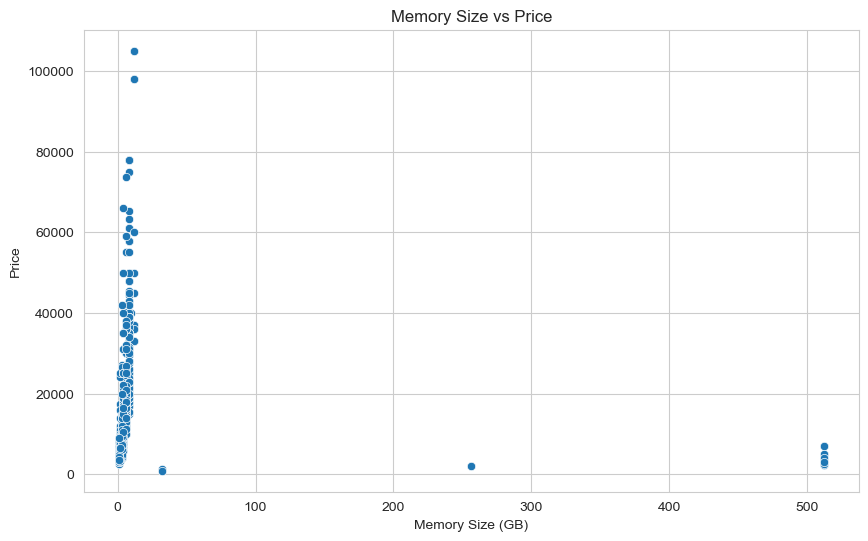

In [5]:
# Extracting numeric memory size
import re

def extract_memory_size(memory_str):
    # Extracting the numeric part of the memory size
    match = re.search(r'(\d+)', memory_str)
    if match:
        return int(match.group(1))
    else:
        return None

mobileEDA['memory_size'] = mobileEDA['memory'].apply(extract_memory_size)

# Plotting the relationship between memory size and price
plt.figure(figsize=(10, 6), facecolor='white')
sns.scatterplot(x='memory_size', y='price', data=mobileEDA)
plt.title('Memory Size vs Price')
plt.xlabel('Memory Size (GB)')
plt.ylabel('Price')
plt.show()

The scatterplot indicates a positive correlation between memory size (in GB) and price. As the memory size increases, the price of the mobile also tends to increase. 

This pattern suggests that memory size is a significant factor influencing the price of mobiles, with higher memory sizes commanding higher prices.

This relationship aligns with expectations, as larger memory sizes offer more storage and better performance, which are desirable features that typically come at a higher cost.

RELATIONSHIP BETWEEN PROCESSOR TYPE AND PRICE

C:\Users\pabba\AppData\Local\Temp\ipykernel_6600\1865203253.py:12: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  plt.tight_layout()
C:\Users\pabba\AppData\Local\Temp\ipykernel_6600\1865203253.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\pabba\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


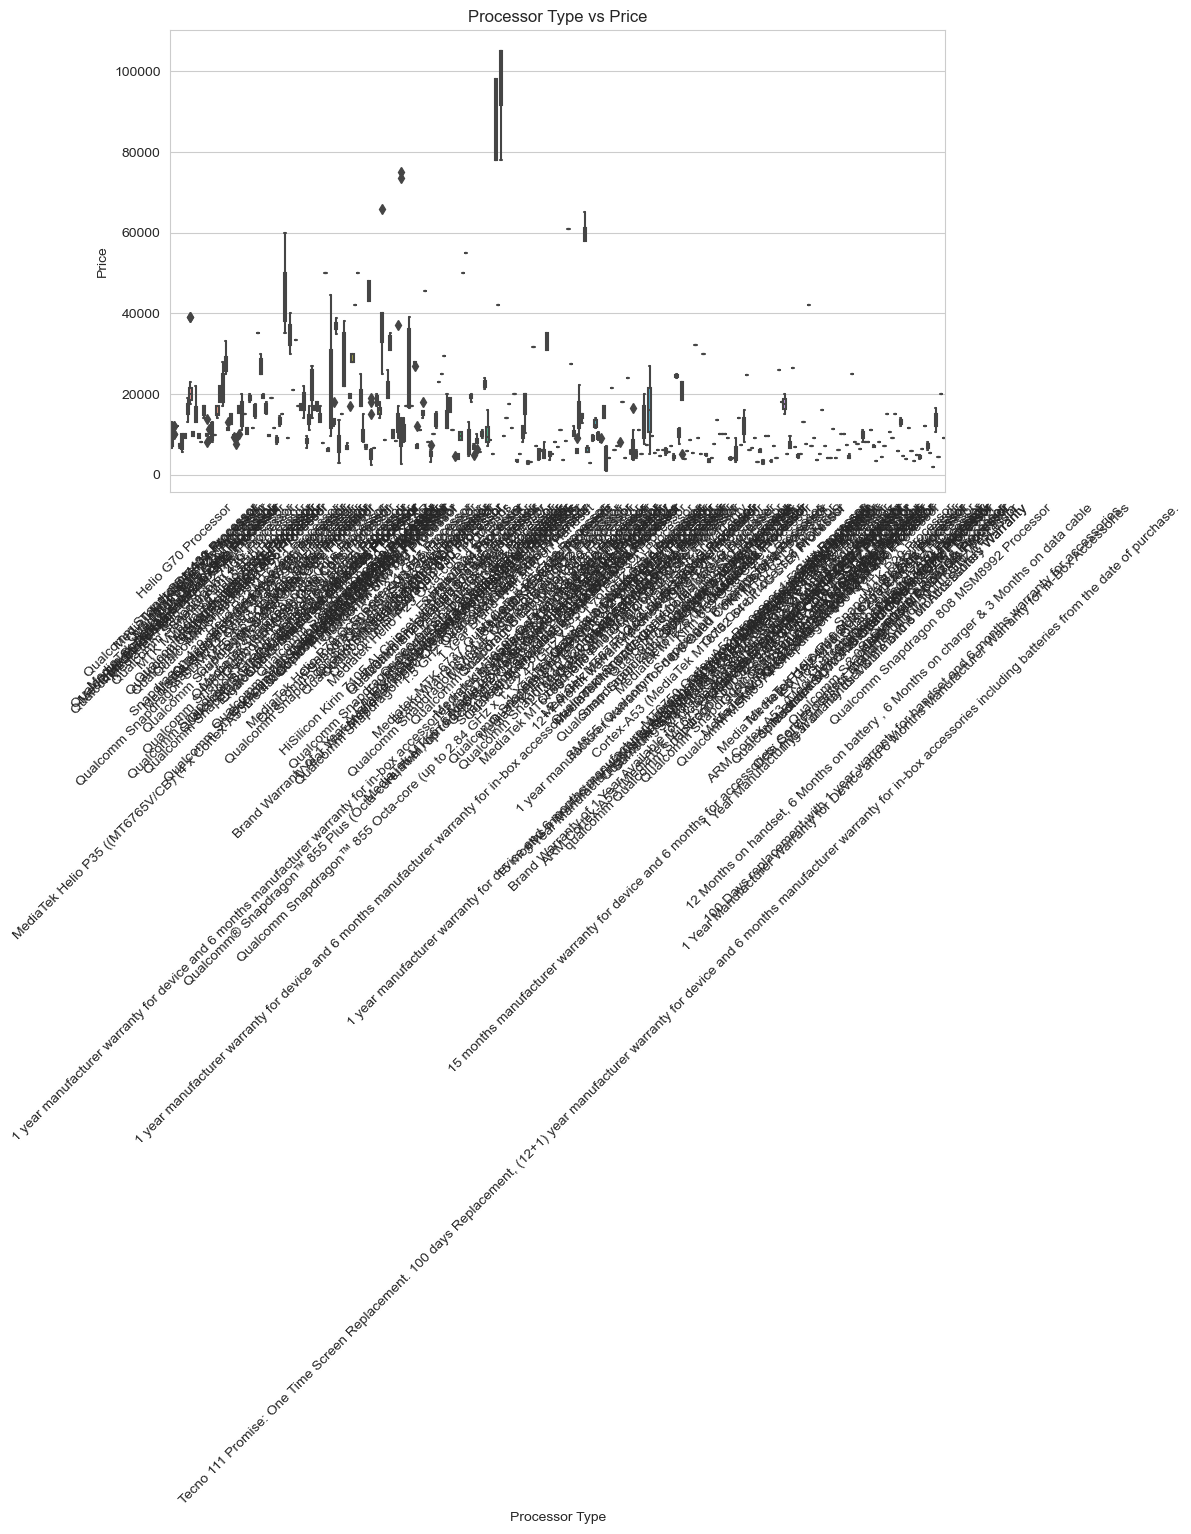

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
if 'processor' in mobileEDA.columns:
    # Plotting the relationship between processor type and price
    plt.figure(figsize=(10, 6), facecolor='white')
    sns.boxplot(x='processor', y='price', data=mobileEDA)
    plt.xticks(rotation=45)
    plt.title('Processor Type vs Price')
    plt.xlabel('Processor Type')
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()
else:
    print('Processor type needs to be extracted or is not available.')

The boxplot illustrates the price distribution for different processor types. Each processor type has a range of prices, with the median price indicated by the line within each box. 

Some processor types tend to have higher median prices, suggesting they might be associated with higher performance or more premium mobile phones. 

Additionally, the variation in price within each processor type, as indicated by the length of the boxes and the whiskers, suggests a wide range of options available to consumers within each processor category.

This visualization highlights the impact of processor type on mobile phone pricing, indicating that certain processors are likely to be found in more expensive devices.

RELATIONSHIP BETWEEN CAMERA QUALITY AND PRICE

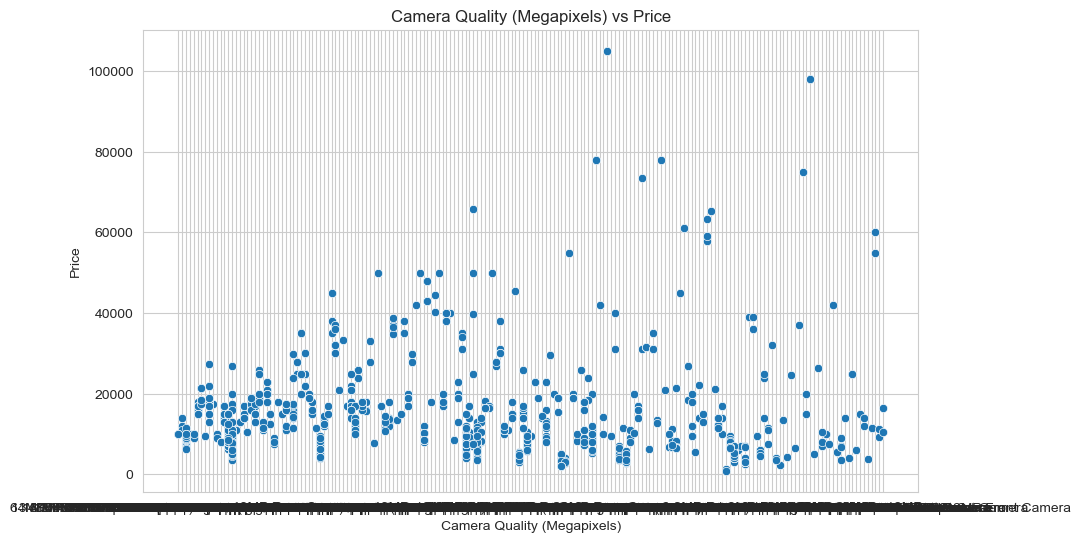

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Checking if there's a direct column for camera quality or if it needs to be extracted
if 'camera' in mobileEDA.columns:
    # Assuming camera quality is directly related to the megapixels, we'll use that for analysis
    plt.figure(figsize=(10, 6), facecolor='white')
    sns.scatterplot(x='camera', y='price', data=mobileEDA)
    plt.title('Camera Quality (Megapixels) vs Price')
    plt.xlabel('Camera Quality (Megapixels)')
    plt.ylabel('Price')
    plt.show()
else:
    print('Camera quality needs to be extracted or is not available.')

The scatterplot indicates a general trend where mobiles with higher camera quality (more megapixels) tend to have a higher price. However, the relationship does not appear to be as strong or direct as with some other features, such as memory size.

There's considerable variation in price at almost all levels of camera quality, suggesting that while camera quality does contribute to the price, it is likely one of several factors that determine the final price of a mobile phone.

BRAND ANALYSIS:

If the dataset includes brand information, you can analyze the market share of each brand within the dataset. Further, comparing average prices, battery capacities, and other features by brand could provide insights into brand positioning.

For the BRAND ANALYSIS, we'll extract the brand name from the 'name' column, then analyze market share, average prices, and battery capacities by brand.

In [8]:
# Extract brand names from the 'name' column
mobileEDA['brand'] = mobileEDA['name'].apply(lambda x: x.split()[0])

# Calculate market share, average price, and average battery capacity by brand
brand_analysis = mobileEDA.groupby('brand').agg(
    market_share=('brand', 'count'),
    average_price=('price', 'mean'),
    average_battery_capacity=('battery', lambda x: x.str.extract('(\d+)').astype(int).mean())
).reset_index()

# Calculate the percentage of market share
brand_analysis['market_share_percentage'] = (brand_analysis['market_share'] / brand_analysis['market_share'].sum()) * 100

# Display the brand analysis
print(brand_analysis.sort_values(by='market_share_percentage', ascending=False))

        brand  market_share  average_price  average_battery_capacity  \
38     Realme           134   15946.208955               4254.626866   
41    Samsung           133   27780.563910               4130.451128   
39      Redmi           128   12430.070312               4210.312500   
34       OPPO            81   19076.469136               4037.222222   
44       Vivo            77   17745.714286               4393.701299   
23       Lava            33    4822.818182               2603.030303   
12      Honor            30   15633.433333               3459.000000   
33      Nokia            26   10295.769231               3285.000000   
8      Gionee            26    8658.230769               3456.538462   
16    Infinix            25    9491.000000               4368.000000   
36       POCO            23   19107.695652               4413.043478   
1        Asus            20   12973.550000               4453.500000   
28   Micromax            19    5360.368421               2625.26

The analysis above shows the market share, average price, and average battery capacity for each brand in the dataset.

Brands are sorted by their market share percentage, highlighting their presence in the dataset. 

Realme, Samsung, and Redmi lead in market share, indicating their popularity or prevalence in this dataset. The average price and battery capacity provide insights into the positioning of each brand in terms of pricing strategy and battery specifications. 

Brands like OnePlus and iQOO, despite having lower market shares, show higher average prices, suggesting a premium product offering. Conversely, brands like Lava and Karbonn, with lower average prices, might be targeting the budget segment.

SCREEN SIZE Analysis:

Explore the distribution of screen sizes. You could categorize screen sizes into small, medium, and large and see how many devices fall into each category. Additionally, examining the relationship between screen size and price could yield interesting insights.

For the SCREEN SIZE Analysis screen size analysis, we'll categorize screen sizes into small, medium, and large based on the 'display' column and explore their distribution and relationship with price.

In [14]:
print(mobileEDA['memory'])

KeyError: 'memory'

In [13]:
import re

def extract_memory_size(memory_str):
    # Extracting the numeric part of the memory size
    match = re.search(r'(\d+)', memory_str)
    if match:
        return int(match.group(1))
    else:
        return None

mobileEDA['memory_size'] = mobileEDA['memory'].apply(extract_memory_size)
mobileEDA['memory_size']

KeyError: 'memory'

In [ ]:

memory_split = mobileEDA['memory'].str.split("|", expand=True)

# Assigning the split columns to DataFrame

mobileEDA['RAM'] = memory_split[0]

mobileEDA['ROM'] = memory_split[0]

mobileEDA['Memory'] = memory_split[0]

mobileEDA.head()